<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Visión por Computadora</center></span>
## <span style="color:red"><center>tratamiento y clasificación de video</center></span>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



## <span style="color:blue">Introducción</span>

¿Qué es un video? En forma muy resumida, son imagenes en secuencia. Un video está compuesto de muchas imágenes puestas "una sobre la otra", para dar la sensación de movimiento. Estas imágenes van a tomar el nombre de "fotogramas".

<figure>
    <center>
<img src="../Imagenes/flipbook-flip.gif"  width="500" height="280" align="center"/> 
    </center>
</figure>

Lo más importante de la muestra de estas imágenes y su visualización es su "tasa de fotogramas", que explica la frecuencia en la que un dispositivo muestra cada fotograma. Esta se representa en "Fotogramas por Segundo" o FPS.

<figure>
    <center>
<img src="../Imagenes/12_6_12_BouncingBall_12fps.gif"  width="550" height="360" align="center"/> 
    </center>
</figure>

Entre mayor sea lel número de FPS, los videos tendrán se verán más "continuos" o "suaves", ya que habrán más fotogramas.

<figure>
    <center>
<img src="../Imagenes/fps_comparison.gif"  width="550" height="360" align="center"/> 
    </center>
</figure>

## <span style="color:blue">Reconocimiento de acciones humanas</span>

Dentro del caso del procesamiento de video, la tarea "baseline" es el "reconocimiento de acciones humanas", donde, a partir de grabaciones humanas, se busca obtener qué acción específica está haciendo la persona.

<figure>
    <center>
<img src="../Imagenes/human-action-rec.png"  width="685" height="415" align="center"/> 
    </center>
</figure>

¿Cuál sería un posible acercamiento? Como ya dijimos, podríamos separar el video en sus fotogramas, parearlas con la etiqueta del video y hacer un trabajo de clasificación. Luego lo que despliega el modelo sobre cada fotograma de manera constante.

Esto funciona, pero no es una buena manera. como podemos apreciar en este tutorial de [PyImageSearch](https://pyimagesearch.com/2019/07/15/video-classification-with-keras-and-deep-learning/) aplicar convoluciones bidimensionales sin más genera un modelo "parpadeante" o "dudoso". La solución que producen en el mismo tutorial involucra hacer una especie de "clustering" sobre todos los fotogramas y encontrar la predicción promedio, cosa que evita las dudas del modelo, sin embargo, esto no resuelve el problema menos notorio, pero más importante para hacer un verdadero modelo de procesamiento de video:

### ESTOS MODELOS NO TIENEN CONEPTO DE TEMPORALIDAD

Aunque podamos separar los videos en sus fotogramas, trabajar cada imagen de manera individual derrota el propósito de video y movimiento. Necesitamos una forma de que el modelo comprenda la secuencialidad de los datasets de video.

Por suerte, la composición de video ya nos permite aprovechar la temporalidad de los videos. Vamos a ver dos modelos que hacen esto mismo.

## <span style="color:blue">Tensores de video</span>

Una sola imagen a color puede representarse como un tensor tridimensional.Este tendrá la forma aproximada $(W, H, C)$. 

<figure>
    <center>
<img src="../Imagenes/3d-tensor.png"  width="350" height="250" align="center"/> 
    </center>
</figure>

De nuevo, esta es una única imagen. Y como hemos repetido, viendo un archivo de video como imagenes concatenadas, el tensor capaz de representar un archivo de video debe ser tetradimensional. ¿Cómo sería este?

De Hecho, ya hemos trabajado con estructuras de imagenes concatenadas. cuando creamos un generador en Tensorflow on un DataLoader en Pytorch, agrupamos muestras de tensores de imagenes en "lotes". Al final estos tienen la forma $(B, W, H, C)$. Les suena parecido?
<figure>
    <center>
<img src="../Imagenes/video-fps.jpg"  width="1025" height="460" align="center"/> 
    </center>
</figure>

Necesitamos procesar nuestro conjunto de datos como si estos fueran lotes a partir del número de fotogramas que tienen estos. Al final tendremos tensores de forma $(F, W, H, C)$

## <span style="color:blue">Redes convolucionales Recurrentes</span>

Ya que tenemos una nueva dimensión con la cual preocuparnos, nuestros métodos tienen que reflejar esto.

Específicamente, esta nueva dimensión causa la necesidad de tener nociones de tiempo o secuencia. Así que tenemos tres tareas:

- Obtener las características generales del video.
- comprender la temporalidad del video.
- Clasificar el video entre una serie de etiquetas.

Por suerte tenemos un tipo de red para cada uno: 

- CNN para el reconocimiento de caracterísiticas.
- RNN para el reconocimiento de secuencias.
- FCN para la clasificación.

así que nuestro modelo tiene que pasar por cada uno de estos. De forma general, tenemos que agregar una capa recurrente dentro del modelo tradicional convolucional.

<figure>
    <center>
<img src="../Imagenes/cnn-rnn.png"  width="1025" height="460" align="center"/> 
    </center>
</figure>

## <span style="color:blue">Convoluciones 3D</span>

Hemos visto las operaciones convolucionales en 1 y 2 dimensiones, pero esto no se detiene ahí. Podemos extender a la cantidad de dimensiones que nos sea teóricamente posible.

En el caso anterior, se hace un análisis de características sobre cada fotograma y luego se implementa la secuencialidad sobre el conjunto completo. Aplicando concoluciones tridimensionales es posible obtener la secuencialidad de nuestros datos directamente desde la obtención de caraterísticas. Junto con esto la generación de mapas de características se hace de una forma más "global" o "conjunta" debido a que no tratamos cada fotograma de manera individual.

Todo el proceso es esencialmente el mismo que con los tensores 2D, solo que ahora el kernel es tridimensional, y ahora tiene una nueva dimensión por la cuál deslizarse

<figure>
    <center>
<img src="../Imagenes/3d-conv.gif"  width="838" height="490" align="center"/> 
    </center>
</figure>

Vamos a aplicar estos dos modelos a la base de datos [HMDB51](https://serre-lab.clps.brown.edu/resource/hmdb-a-large-human-motion-database/), que tiene 2 gigas de videos de películas, televisión, juegos y video sobre movimientos y acciones humanas.

In [1]:
import numpy as np
import cv2
import os
from tqdm.notebook import tqdm_notebook

In [19]:
#!wget --no-check-certificate \
#    http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar \
#    -O /mnt/storage/Datasets/hmdb51/hmdb51_org.rar

obtenemos los directorios de cada categoría

In [2]:
data_path = '/mnt/storage/Datasets/hmdb51'
sub_folder = 'hmdb51_org'
sub_folder_jpg = 'hmdb51_jpg'

path2data = "/mnt/storage/Datasets/hmdb51"
sub_folder = "hmdb51_org"
sub_folder_jpg = "hmdb51_jpg"
path2aCatgs = os.path.join(path2data, sub_folder)
path2ajpgs = os.path.join(path2data, sub_folder_jpg)

os.makedirs(path2ajpgs, exist_ok = True)

listOfCategories = os.listdir(path2aCatgs)
listOfCategories, len(listOfCategories)

(['brush_hair',
  'cartwheel',
  'catch',
  'chew',
  'clap',
  'climb',
  'climb_stairs',
  'dive',
  'draw_sword',
  'dribble',
  'drink',
  'eat',
  'fall_floor',
  'fencing',
  'flic_flac',
  'golf',
  'handstand',
  'hit',
  'hug',
  'jump',
  'kick',
  'kick_ball',
  'kiss',
  'laugh',
  'pick',
  'pour',
  'pullup',
  'punch',
  'push',
  'pushup',
  'ride_bike',
  'ride_horse',
  'run',
  'shake_hands',
  'shoot_ball',
  'shoot_bow',
  'shoot_gun',
  'sit',
  'situp',
  'smile',
  'smoke',
  'somersault',
  'stand',
  'swing_baseball',
  'sword',
  'sword_exercise',
  'talk',
  'throw',
  'turn',
  'walk',
  'wave'],
 51)

In [33]:
for cat in listOfCategories:
    print("category:", cat)
    path2acat = os.path.join(path2aCatgs, cat)
    listOfSubs = os.listdir(path2acat)
    print("number of sub-folders:", len(listOfSubs))
    print("-"*50)

category: brush_hair
number of sub-folders: 107
--------------------------------------------------
category: cartwheel
number of sub-folders: 107
--------------------------------------------------
category: catch
number of sub-folders: 102
--------------------------------------------------
category: chew
number of sub-folders: 109
--------------------------------------------------
category: clap
number of sub-folders: 130
--------------------------------------------------
category: climb
number of sub-folders: 108
--------------------------------------------------
category: climb_stairs
number of sub-folders: 112
--------------------------------------------------
category: dive
number of sub-folders: 127
--------------------------------------------------
category: draw_sword
number of sub-folders: 103
--------------------------------------------------
category: dribble
number of sub-folders: 145
--------------------------------------------------
category: drink
number of sub-folders: 1

Hacemos una función para deconstruir el video en sus fotogramas

In [5]:
def get_frames(filename, n_frames= 1):
    frames = []
    v_cap = cv2.VideoCapture(filename)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_list= np.linspace(0, v_len-1, n_frames+1, dtype=np.int16)
    
    for fn in range(v_len):
        success, frame = v_cap.read()
        if success is False:
            continue
        if (fn in frame_list):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
            frames.append(frame)
    v_cap.release()
    return frames, v_len

Y una función para guardar estos fotogramas en directorios dentro de nuestro sistema

In [6]:
def store_frames(frames, path2store):
    for ii, frame in enumerate(frames):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  
        path2img = os.path.join(path2store, "frame"+str(ii)+".jpg")
        cv2.imwrite(path2img, frame)

Los videos están en formato "avi", así que lo especificamos.

Además, para hacer la tarea más sencilla, y hacer un poco de aumentación de datos, separaremos cada video en carpetas de 16 fotogramas cada uno

In [17]:
extension = ".avi"
n_frames = 16
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg)
        path2store = path2store.replace(extension, "")
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)  

KeyboardInterrupt: 

Ahora se hace una función para obtener tanto los videos como las etiquetas en listas.

In [7]:
def get_vids(path2ajpgs):
    listOfCats = os.listdir(path2ajpgs)
    ids = []
    labels = []
    for catg in listOfCats:
        path2catg = os.path.join(path2ajpgs, catg)
        listOfSubCats = os.listdir(path2catg)
        path2subCats= [os.path.join(path2catg,los) for los in listOfSubCats]
        ids.extend(path2subCats)
        labels.extend([catg]*len(listOfSubCats))
    return ids, labels, listOfCats 

In [35]:
all_vids, all_labels, catgs = get_vids(jpgs_path)
len(all_vids), len(all_labels), len(catgs)

(6766, 6766, 51)

Observemos cómo están organizados los datos

In [36]:
all_vids[:1], all_labels[:3], catgs[:5]

(['/mnt/storage/Datasets/hmdb51/hmdb51_jpg/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0'],
 ['brush_hair', 'brush_hair', 'brush_hair'],
 ['brush_hair', 'cartwheel', 'catch', 'chew', 'clap'])

Usamos un diccionario para convertir las etiquetas en valores numéricos

In [37]:
labels_dict = {}
ind = 0
for uc in catgs:
    labels_dict[uc] = ind
    ind+=1
labels_dict

{'brush_hair': 0,
 'cartwheel': 1,
 'catch': 2,
 'chew': 3,
 'clap': 4,
 'climb': 5,
 'climb_stairs': 6,
 'dive': 7,
 'draw_sword': 8,
 'dribble': 9,
 'drink': 10,
 'eat': 11,
 'fall_floor': 12,
 'fencing': 13,
 'flic_flac': 14,
 'golf': 15,
 'handstand': 16,
 'hit': 17,
 'hug': 18,
 'jump': 19,
 'kick': 20,
 'kick_ball': 21,
 'kiss': 22,
 'laugh': 23,
 'pick': 24,
 'pour': 25,
 'pullup': 26,
 'punch': 27,
 'push': 28,
 'pushup': 29,
 'ride_bike': 30,
 'ride_horse': 31,
 'run': 32,
 'shake_hands': 33,
 'shoot_ball': 34,
 'shoot_bow': 35,
 'shoot_gun': 36,
 'sit': 37,
 'situp': 38,
 'smile': 39,
 'smoke': 40,
 'somersault': 41,
 'stand': 42,
 'swing_baseball': 43,
 'sword': 44,
 'sword_exercise': 45,
 'talk': 46,
 'throw': 47,
 'turn': 48,
 'walk': 49,
 'wave': 50}

continuamos haciendo el trabajo más sencillo: Hacemos un subconjunto de datos de solo las 5 primeras clases.

In [38]:
num_classes = 5
unique_ids = [id_ for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(555, 555)

Separamos en datos de entrenamiento y validación

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels)) 

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

499 499
56 56


In [40]:
train_ids[:5], train_labels[:5]

(['/mnt/storage/Datasets/hmdb51/hmdb51_jpg/brush_hair/Brushing_my_waist_lenth_hair_brush_hair_u_nm_np1_ba_goo_1',
  '/mnt/storage/Datasets/hmdb51/hmdb51_jpg/chew/Bubble_blowing_3!_chew_h_nm_np1_le_bad_2',
  '/mnt/storage/Datasets/hmdb51/hmdb51_jpg/brush_hair/Brushing_hair__the_right_way_brush_hair_u_nm_np1_fr_goo_1',
  '/mnt/storage/Datasets/hmdb51/hmdb51_jpg/clap/Standing_clap_f_cm_np1_fr_med_0',
  '/mnt/storage/Datasets/hmdb51/hmdb51_jpg/chew/cotton_candy_bubble_gum_chew_h_nm_np1_fr_med_0'],
 ['brush_hair', 'chew', 'brush_hair', 'clap', 'chew'])

In [41]:
test_ids[:5], test_labels[:5]

(['/mnt/storage/Datasets/hmdb51/hmdb51_jpg/brush_hair/Ella_brushing_her_amazing_long_hair_brush_hair_u_cm_np1_ba_goo_2',
  '/mnt/storage/Datasets/hmdb51/hmdb51_jpg/chew/Wanda_Su_and_niece__T__blowing_bubbles_chew_u_nm_np2_fr_med_1',
  '/mnt/storage/Datasets/hmdb51/hmdb51_jpg/clap/Return_of_the_King_12_clap_u_nm_np1_fr_goo_4',
  '/mnt/storage/Datasets/hmdb51/hmdb51_jpg/cartwheel/Rush_Hour_4_Turnk_r_cartwheel_f_cm_np1_le_med_6',
  '/mnt/storage/Datasets/hmdb51/hmdb51_jpg/chew/#2_Gum_chew_h_nm_np1_fr_med_0'],
 ['brush_hair', 'chew', 'clap', 'cartwheel', 'chew'])

Podemos definir ahora el dataset personalizado. Dentro de este se van a aplicar ligeras transformaciones lineales sobre los datos para reducir sesgos

In [42]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import torch
import random

np.random.seed(2020)
random.seed(2020)
torch.manual_seed(2020)

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):      
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)
        
        seed = np.random.randint(1e9)        
        frames_tr = []
        for frame in frames:
            random.seed(seed)
            np.random.seed(seed)
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

Vamos a definir los dos modelos a la vez, dejando las especificiones de cada uno dependiendo de cuál se elija. En ambos casos vamos a usar Transfer Learning para aprovechar modelos pre entrenados.

In [43]:
# choose one
model_type = "3dcnn"
#model_type = "rnn"    

timesteps =16
if model_type == "rnn":
    h, w =224, 224
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
else:
    h, w = 112, 112
    mean = [0.43216, 0.394666, 0.37645]
    std = [0.22803, 0.22145, 0.216989]

In [44]:
import torchvision.transforms as transforms

train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),  
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),    
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])     

In [45]:
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))


499


Veamos la forma de los tensores del dataset

In [46]:
imgs, label = train_ds[10]
imgs.shape, label

(torch.Size([16, 3, 112, 112]), 4)

Visualizemos algunos de los fotogramas

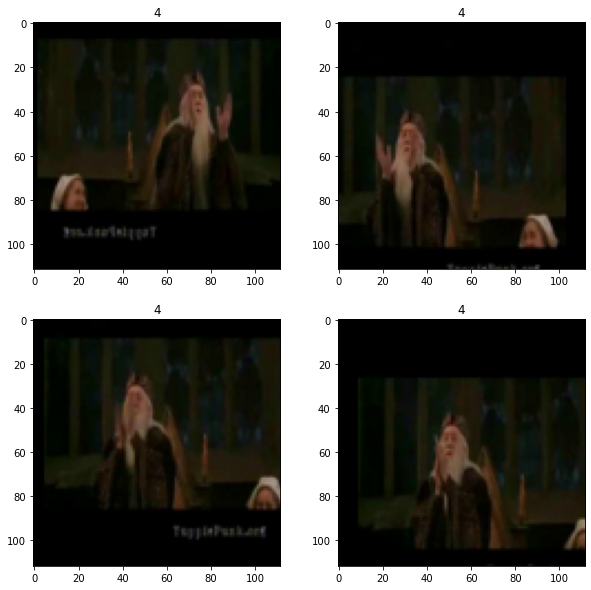

In [47]:
import matplotlib.pylab as plt
from torchvision.transforms.functional import to_pil_image
%matplotlib inline

def denormalize(x_, mean, std):
    x = x_.clone()
    for i in range(3):
        x[i] = x[i]*std[i]+mean[i]
    x = to_pil_image(x)        
    return x

plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.title(label)

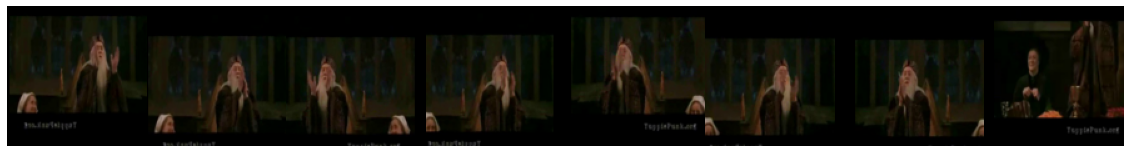

In [48]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::2]):
    plt.subplot(1,8,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

In [49]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ]) 
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

56


In [50]:
imgs, label = test_ds[5]
imgs.shape, label

(torch.Size([16, 3, 112, 112]), 3)

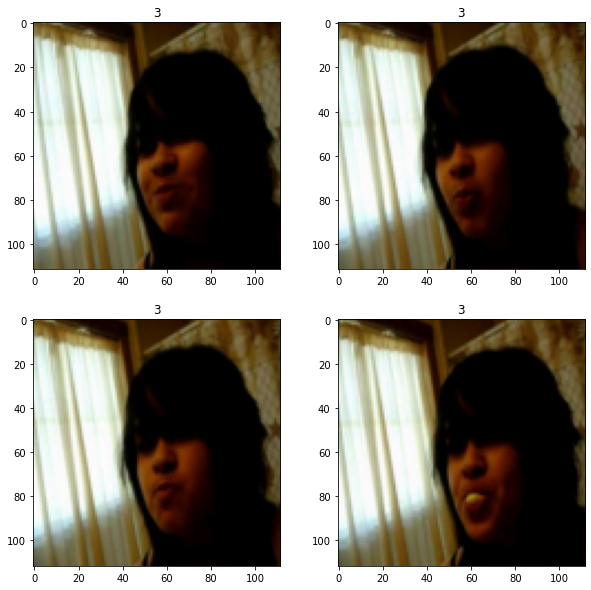

In [51]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.title(label)

Podemos ahora definir las "funciones de intercalamiento" o "collate_fn". Estas funciones especifican la forma en que se van a generar los lotes de datos en los Loaders.

In [52]:
def collate_fn_r3d_18(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    imgs_tensor = torch.transpose(imgs_tensor, 2, 1)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor,labels_tensor

def collate_fn_rnn(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor,labels_tensor
    

batch_size = 4
if model_type == "rnn":
    train_dl = DataLoader(train_ds, batch_size= batch_size,
                          shuffle=True, collate_fn= collate_fn_rnn)
    test_dl = DataLoader(test_ds, batch_size= batch_size,
                         shuffle=False, collate_fn= collate_fn_rnn)  
else:
    train_dl = DataLoader(train_ds, batch_size= batch_size, 
                          shuffle=True, collate_fn= collate_fn_r3d_18)
    test_dl = DataLoader(test_ds, batch_size= batch_size, 
                         shuffle=False, collate_fn= collate_fn_r3d_18)    

examinemos los resultados de los dataloaders

In [53]:
for xb,yb in train_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([4, 3, 16, 112, 112]) torch.Size([4])


In [54]:
for xb,yb in test_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([4, 3, 16, 112, 112]) torch.Size([4])


Definiremos la función CNN-RNN. Esta estará basada en un modelo Resnet 18. donde se reemplazaran algunas capas

In [55]:
from torch import nn
from torchvision import models

class Resnet18Rnn(nn.Module):
    def __init__(self, params_model):
        super(Resnet18Rnn, self).__init__()
        num_classes = params_model["num_classes"]
        dr_rate= params_model["dr_rate"]
        pretrained = params_model["pretrained"]
        rnn_hidden_size = params_model["rnn_hidden_size"]
        rnn_num_layers = params_model["rnn_num_layers"]
        
        baseModel = models.resnet18(pretrained=pretrained) #obtenemos el resnet completo
        num_features = baseModel.fc.in_features #extraemos los valores "aplanados" de la capa FC
        baseModel.fc = Identity() #convertimos la capa Fc en una que no hace nada
        self.baseModel = baseModel
        self.dropout= nn.Dropout(dr_rate) #agregamos dropout
        self.rnn = nn.LSTM(num_features, rnn_hidden_size, rnn_num_layers) #agregamos capa LSTM
        self.fc1 = nn.Linear(rnn_hidden_size, num_classes) #agregamos una nueva capa FC
    def forward(self, x):
        b_z, ts, c, h, w = x.shape
        ii = 0
        y = self.baseModel((x[:,ii])) #corremos el primer fotograma por el modelo
        output, (hn, cn) = self.rnn(y.unsqueeze(1)) 
        for ii in range(1, ts): #iteramos sobre el resto de fotogramas de un solo video
            y = self.baseModel((x[:,ii]))
            out, (hn, cn) = self.rnn(y.unsqueeze(1), (hn, cn))
        out = self.dropout(out[:,-1])
        out = self.fc1(out) 
        return out 
    
class Identity(nn.Module): #función dummy. Su función es no hacer nada
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x 


Para la convolución 3D implemente lo descargamos y adaptamos el segmento completamente conectado

In [56]:
from torchvision.models.video import r3d_18, R3D_18_Weights

if model_type == "rnn":
    params_model={
        "num_classes": num_classes,
        "dr_rate": 0.1,
        "pretrained" : True,
        "rnn_num_layers": 1,
        "rnn_hidden_size": 100,}
    model = Resnet18Rnn(params_model)        
else:
    model = models.video.r3d_18(weights=R3D_18_Weights.DEFAULT, progress=False)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)

In [57]:
with torch.no_grad():
    if model_type=="rnn":
        x = torch.zeros(1, 16, 3, h, w)
    else:
        x = torch.zeros(1, 3, 16, h, w)
    y= model(x)
    print(y.shape)

torch.Size([1, 5])


In [58]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

analicemos el modelo 3D

In [59]:
model

VideoResNet(
  (stem): BasicStem(
    (0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1):

ahora definimos el proceso de entrenamiento.

In [60]:
import copy

def train_val(model, params):
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    loss_history={
        "train": [],
        "val": [],
    }
    
    metric_history={
        "train": [],
        "val": [],
    }
    
    best_model_wts = copy.deepcopy(model.state_dict()) #guardamos una copia inicial del modelo
    best_loss=float('inf')
    
    for epoch in range(num_epochs):
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,opt)
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl)
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
        
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)
        
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts)
        

        print("train loss: %.6f, dev loss: %.6f, accuracy: %.2f" %(train_loss,val_loss,100*val_metric))
        print("-"*10) 
    model.load_state_dict(best_model_wts)
        
    return model, loss_history, metric_history
 
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

def metrics_batch(output, target):
    pred = output.argmax(dim=1, keepdim=True)
    corrects=pred.eq(target.view_as(pred)).sum().item()
    return corrects

def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    with torch.no_grad():
        metric_b = metrics_batch(output,target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b
    

def loss_epoch(model,loss_func,dataset_dl,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data = len(dataset_dl.dataset)
    for xb, yb in tqdm_notebook(dataset_dl):
        xb=xb.to(device)
        yb=yb.to(device)
        output=model(xb)
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        running_loss+=loss_b
        
        if metric_b is not None:
            running_metric+=metric_b
    loss=running_loss/float(len_data)
    metric=running_metric/float(len_data)
    return loss, metric

In [61]:
path2weights = "../modelos/weights.pt"
torch.save(model.state_dict(), path2weights)

In [62]:
from torch import optim
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau

loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=3e-5)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=5,verbose=1)
os.makedirs("../modelos", exist_ok=True)

params_train={
    "num_epochs": 20,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": test_dl,
    "lr_scheduler": lr_scheduler,
    "path2weights": "../modelos/weights_"+model_type+".pt",
    }
model,loss_hist,metric_hist = train_val(model,params_train)

Epoch 0/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.998735, dev loss: 0.450315, accuracy: 91.07
----------
Epoch 1/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.536306, dev loss: 0.345438, accuracy: 89.29
----------
Epoch 2/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.404371, dev loss: 0.285890, accuracy: 94.64
----------
Epoch 3/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.386678, dev loss: 0.235682, accuracy: 91.07
----------
Epoch 4/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.266958, dev loss: 0.252262, accuracy: 92.86
----------
Epoch 5/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.240937, dev loss: 0.295903, accuracy: 92.86
----------
Epoch 6/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.246890, dev loss: 0.242084, accuracy: 92.86
----------
Epoch 7/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.240514, dev loss: 0.268567, accuracy: 92.86
----------
Epoch 8/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.287623, dev loss: 0.252366, accuracy: 94.64
----------
Epoch 9/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.159363, dev loss: 0.204951, accuracy: 94.64
----------
Epoch 10/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.198487, dev loss: 0.209093, accuracy: 92.86
----------
Epoch 11/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.109224, dev loss: 0.261039, accuracy: 94.64
----------
Epoch 12/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.191586, dev loss: 0.208858, accuracy: 92.86
----------
Epoch 13/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.087892, dev loss: 0.223163, accuracy: 92.86
----------
Epoch 14/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.145813, dev loss: 0.307886, accuracy: 92.86
----------
Epoch 15/19, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 00016: reducing learning rate of group 0 to 1.5000e-05.
Loading best model weights!
train loss: 0.127426, dev loss: 0.362732, accuracy: 92.86
----------
Epoch 16/19, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.174752, dev loss: 0.212019, accuracy: 92.86
----------
Epoch 17/19, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

train loss: 0.206914, dev loss: 0.209456, accuracy: 94.64
----------
Epoch 18/19, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.169750, dev loss: 0.189151, accuracy: 92.86
----------
Epoch 19/19, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.202786, dev loss: 0.174231, accuracy: 94.64
----------


In [63]:
def plot_loss(loss_hist, metric_hist):

    num_epochs= len(loss_hist["train"])

    plt.title("Train-Val Loss")
    plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
    plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
    plt.ylabel("Loss")
    plt.xlabel("Training Epochs")
    plt.legend()
    plt.show()

    plt.title("Train-Val Accuracy")
    plt.plot(range(1,num_epochs+1), metric_hist["train"],label="train")
    plt.plot(range(1,num_epochs+1), metric_hist["val"],label="val")
    plt.ylabel("Accuracy")
    plt.xlabel("Training Epochs")
    plt.legend()
    plt.show()

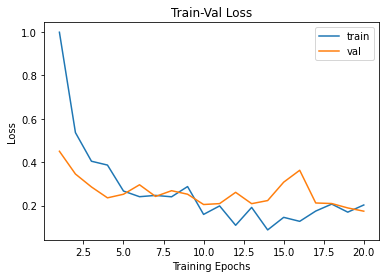

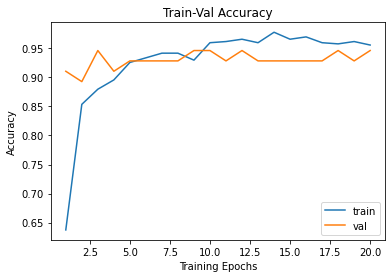

In [64]:
plot_loss(loss_hist, metric_hist)

In [65]:
path2vido = categories_path+"/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0.avi"
frames, v_len = get_frames(path2vido, n_frames=16)
len(frames), v_len

(16, 409)

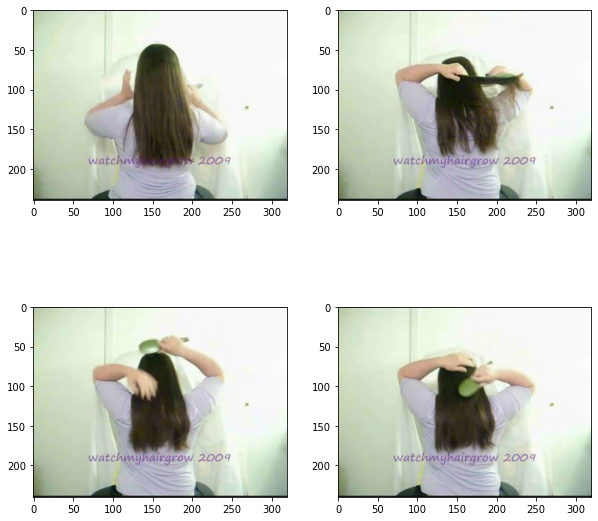

In [66]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(frames[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(img)

In [67]:
def transform_frames(frames, model_type="rnn"):
    if model_type == "rnn":
        h, w = 224, 224
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
    else:
        h, w = 112, 112
        mean = [0.43216, 0.394666, 0.37645]
        std = [0.22803, 0.22145, 0.216989]

    test_transformer = transforms.Compose([
                transforms.Resize((h,w)),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)]) 

    frames_tr = []
    for frame in frames:
        frame = Image.fromarray(frame)
        frame_tr = test_transformer(frame)
        frames_tr.append(frame_tr)
    imgs_tensor = torch.stack(frames_tr)    

    if model_type=="3dcnn":
        imgs_tensor = torch.transpose(imgs_tensor, 1, 0)
    imgs_tensor = imgs_tensor.unsqueeze(0)
    return imgs_tensor

In [68]:
imgs_tensor = transform_frames(frames, model_type)
print(imgs_tensor.shape, torch.min(imgs_tensor), torch.max(imgs_tensor))

torch.Size([1, 3, 16, 112, 112]) tensor(-1.8092) tensor(2.8736)


In [69]:
with torch.no_grad():
    out = model(imgs_tensor.to(device)).cpu()
    print(out.shape)
    pred = torch.argmax(out).item()
    print(pred)

torch.Size([1, 5])
0
